In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd



In [17]:
#df = pd.read_csv (r'home/umair/pCloudDrive/ut1-second-semester/computational intelligence/CI Project 1/dataset_1.xlsx')
#print (df)

my_sheet = 'EpiParo '
file_name = '/home/umair/pCloudDrive/ut1-second-semester/computational-intelligence/CI-project-1/dataset_1.xlsx' # name of your excel file
cmu_data_df = pd.read_excel(file_name, sheet_name = my_sheet)
#print(cmu_data_df.head()) 
#print(cmu_data_df)
print(cmu_data_df.columns)


Index(['ID', 'Sex', 'Age', 'BMI', 'Smoking', 'Pathologies', 'Pregnant',
       'Food_Sugar', 'Fat_Salty', 'Soda', 'Alcohol',
       'Frequence_Appoint_Dentist', 'Hygiene_Dental', 'Gingivorrhagia',
       'Stress_Daily', 'PI', 'Diagnosis'],
      dtype='object')


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(cmu_data_df.Sex, cmu_data_df.Diagnosis, random_state=0)
print(X_train.shape)
print(cmu_data_df.Diagnosis)


(168,)
0         Gingivitis
1      Periodontitis
2            Healthy
3            Healthy
4            Healthy
           ...      
219              NaN
220              NaN
221              NaN
222              NaN
223              NaN
Name: Diagnosis, Length: 224, dtype: object


/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


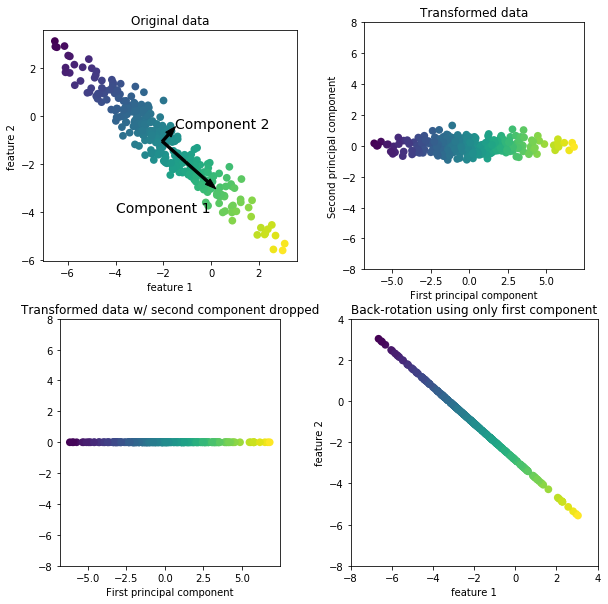

In [21]:
from figures import plot_pca_illustration
plot_pca_illustration()

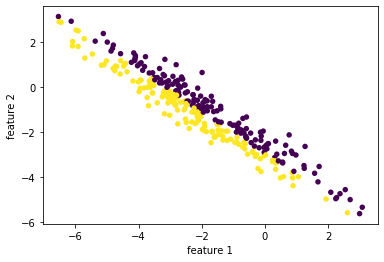

In [22]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2");

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(cmu_data_df.BMI, cmu_data_df.Food_Sugar, random_state=0,
                                                    stratify=cmu_data_df.Food_Sugar)

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

for X, y in zip((X_train_pca, X_test_pca), (y_train, y_test)):
    for i, annot in enumerate(zip(('Gingivitis', 'Iris-Periodontitis', 'Iris-Healthy'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(X[y==i, 0],
                    X[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[14.28571429 22.76943835 20.76124567 17.36111111 13.71742112 19.20438957
 11.73469388 18.81892431 18.07372176 15.625      15.75299307 16.66591595
 15.81632653 20.3125     20.19946976 23.14049587 15.55555556 19.59183673
 20.51508648 15.9122085  19.13265306 20.40816327 20.24489796 15.51246537
 29.9382716  14.67064404 32.04614645 15.625      21.484375   24.69135802
 16.79656006 27.04164413 26.3958034  21.09375    23.80869017 25.05930703
 20.04744562 20.02884153 29.6875     26.92743764 19.44444444 12.44444444
 22.22222222 15.75299307 13.61058601 19.22964862 25.95155709 19.1953028
 22.40587695 20.95717116 14.58333333 20.         24.91349481 14.04958678
 24.03460984 22.85714286 31.25       28.60476495 13.88888889 18.75
 16.66666667 23.7953599  21.09375    14.22222222 19.46740129 24.9107674
 15.64868698 18.56       31.634582   21.46915048 18.19400555 24.81632653
 27.77777778 18.69978086 23.67125363 20.51913409 19.03114187 19.10009183
 18.58281579 28.30385016 27.75510204 12.62002743 24.81632653 14.7579693
 25.05930703 23.87511478 18.         21.14631991 20.01772999 24.03440715
 17.36111111 23.4375     18.28989483 25.50404038 15.24390244 13.2231405
 25.35154137 17.1875     28.         21.2585034  16.2452741  20.76124567
 14.41376515 16.07129812 18.14058957 17.578125   22.22222222 21.9138057
 29.77777778 19.05197378 13.01775148 31.95592287 23.07692308 19.3877551
 18.34319527 26.47210744 23.922423   19.10009183 25.01352082 13.671875
 24.98356345 25.64891762 21.8299522  21.2244898  19.00826446 15.97222222
 25.25951557 25.53544639 14.20118343 25.15589569 22.83287935 15.625
 17.39130435 20.0617284  12.84185493 20.         22.20633069 26.02758248
 27.94214333 41.32231405 20.90238586 15.75299307 16.         28.515625
 16.52892562 17.96875    13.77777778 13.2231405  12.0523416  28.39372634
 18.95654142 37.02422145 20.25462963 26.42356982 25.39343112 16.76038062
 17.21108681 25.15315023 14.03447217 24.         35.01277966 36.33217993
 21.19274242 19.36983471 26.02758248 17.55829904 42.0153356  17.55829904].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.